In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.max_columns = None
import seaborn as sns

## - Exercici 1
Descarrega el dataset adjunt preu lloguer per trimestre i barri.csv extret de la web OpenDataBCN i resumeix-lo estadísticament i gràficament.
Crea almenys una visualització per:

* Una variable categòrica (Districte o Barri)
* Una variable numèrica (Preu)
* Una variable numèrica i una categòrica (Districte i Preu)
* Dues variables numèriques (Any o Trimestre i Preu)
* Tres variables (Barri o Districte, Trimestre i Preu)

In [2]:
df_lloguer=pd.read_csv('preu lloguer per trimestre i barri.csv')
df_lloguer

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2021,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),759.2
1,2021,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),929.6
2,2021,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),808.9
3,2021,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),879.4
4,2021,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),918.0
...,...,...,...,...,...,...,...,...
579,2021,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),15.2
580,2021,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.8
581,2021,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),13.8
582,2021,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),11.7


In [3]:
df_lloguer.columns

Index(['Any', 'Trimestre', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Lloguer_mitja', 'Preu'],
      dtype='object')

* Any : año 2021              
* Trimestre : trimestre del año 2021         
* Codi_Districte : ID del districto   
* Nom_Districte : Nombre del districto   
* Codi_Barri : ID del Barrio       
* Nom_Barri  :Nombre del Barrio       
* Lloguer_mitja  :   Tipo de precio de alquiler
* Preu :Precio en euros

In [4]:
df_lloguer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Any             584 non-null    int64 
 1   Trimestre       584 non-null    int64 
 2   Codi_Districte  584 non-null    int64 
 3   Nom_Districte   584 non-null    object
 4   Codi_Barri      584 non-null    int64 
 5   Nom_Barri       584 non-null    object
 6   Lloguer_mitja   584 non-null    object
 7   Preu            584 non-null    object
dtypes: int64(4), object(4)
memory usage: 36.6+ KB


In [5]:
#Verificamos si existen datos nulos
df_lloguer.count()

Any               584
Trimestre         584
Codi_Districte    584
Nom_Districte     584
Codi_Barri        584
Nom_Barri         584
Lloguer_mitja     584
Preu              584
dtype: int64

In [6]:
df_lloguer.dtypes

Any                int64
Trimestre          int64
Codi_Districte     int64
Nom_Districte     object
Codi_Barri         int64
Nom_Barri         object
Lloguer_mitja     object
Preu              object
dtype: object

In [7]:
#Dimensiones del dataframe.
df_lloguer.shape

(584, 8)

El dataframe cuenta con 584 filas y 8 columnas.

In [8]:
#Resumen Estadístico
df_lloguer.describe()

,Any,Trimestre,Codi_Districte,Codi_Barri
count,584.0,584.000000,584.000000,584.000000
mean,2021.0,2.500000,6.246575,37.000000
std,0.0,1.118992,2.790726,21.089371
min,2021.0,1.000000,1.000000,1.000000
25%,2021.0,1.750000,4.000000,19.000000
50%,2021.0,2.500000,7.000000,37.000000
75%,2021.0,3.250000,8.000000,55.000000
max,2021.0,4.000000,10.000000,73.000000


In [9]:
df_lloguer.describe(include=['object']).transpose()

,count,unique,top,freq
Nom_Districte,584,10,Nou Barris,104
Nom_Barri,584,73,el Raval,8
Lloguer_mitja,584,2,Lloguer mitjà mensual (Euros/mes),292
Preu,584,331,--,44


In [10]:
#Verificamos si existen valores nulos 
df_lloguer.isnull().sum()

Any               0
Trimestre         0
Codi_Districte    0
Nom_Districte     0
Codi_Barri        0
Nom_Barri         0
Lloguer_mitja     0
Preu              0
dtype: int64

In [11]:
df_lloguer.Preu.isna().sum()

0

#### Variables Categóricas 

In [12]:
#Districtos
frecuencia_districtos= df_lloguer.Nom_Districte.value_counts() 
print(frecuencia_districtos)

Nou Barris             104
Horta-Guinardó          88
Sant Martí              80
Sants-Montjuïc          64
Sant Andreu             56
Eixample                48
Sarrià-Sant Gervasi     48
Gràcia                  40
Ciutat Vella            32
Les Corts               24
Name: Nom_Districte, dtype: int64


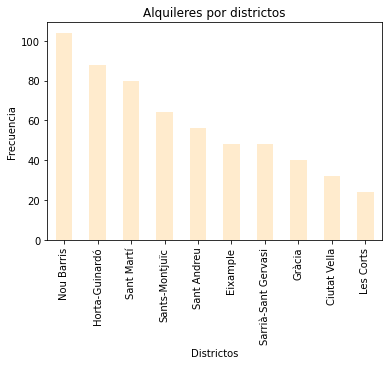

In [13]:
frecuencia_districtos.plot(kind='bar',title="Alquileres por districtos", color='#FFEBCD');
plt.xlabel("Districtos")
plt.ylabel("Frecuencia")
plt.savefig("alquileres.jpg", bbox_inches='tight')

En este gráfico podemos observar la cantidad de alquileres ofrecidos por districtos. Se observa que el districto de Nou Barris es el que presenta mayor cantidad de alquileres meintras tanto que Les Corts la menor cantidad de todos los districtos.

In [14]:
#Barrios
frecuencia_barrios= df_lloguer.Nom_Barri.value_counts()

print(frecuencia_barrios)

el Raval                                 8
la Teixonera                             8
Torre Baró                               8
la Trinitat Nova                         8
la Prosperitat                           8
                                        ..
Sant Gervasi - la Bonanova               8
les Tres Torres                          8
Sarrià                                   8
Vallvidrera, el Tibidabo i les Planes    8
la Verneda i la Pau                      8
Name: Nom_Barri, Length: 73, dtype: int64


#### Variables Numéricas

In [15]:
df_lloguer.Preu.dtypes

dtype('O')

In [16]:
#Al intentar cambiar el tipo de dato de la columna Preu de object a float64, se detecta un dato faltante '--' . 
df_lloguer['Preu']=df_lloguer['Preu'].replace('--',np.nan) # reemplazamos el dato por NaN para poder  cambiar el tipo de dato. 


In [17]:
#Valoración de los datos faltantes
#total NaN 44, total de datos 584
NaN_total= 44/584*100

if NaN_total <= 10 :
    print(NaN_total, '% No significativo')
else:
    print(NaN_total, '% Significativo')

7.534246575342466 % No significativo


In [18]:
#Cambiamos el tipo de dato de la columna Preu de object a float64.
df_lloguer['Preu'] = df_lloguer['Preu'].astype('float64')

In [19]:
df_lloguer['Trimestre'] = df_lloguer['Trimestre'].astype('str')
df_lloguer.Trimestre.dtypes

dtype('O')

In [20]:
df_lloguer.Preu.dtypes

dtype('float64')

In [21]:
df_lloguer['Lloguer_mitja'].value_counts()

Lloguer mitjà mensual (Euros/mes)              292
Lloguer mitjà per superfície (Euros/m2 mes)    292
Name: Lloguer_mitja, dtype: int64

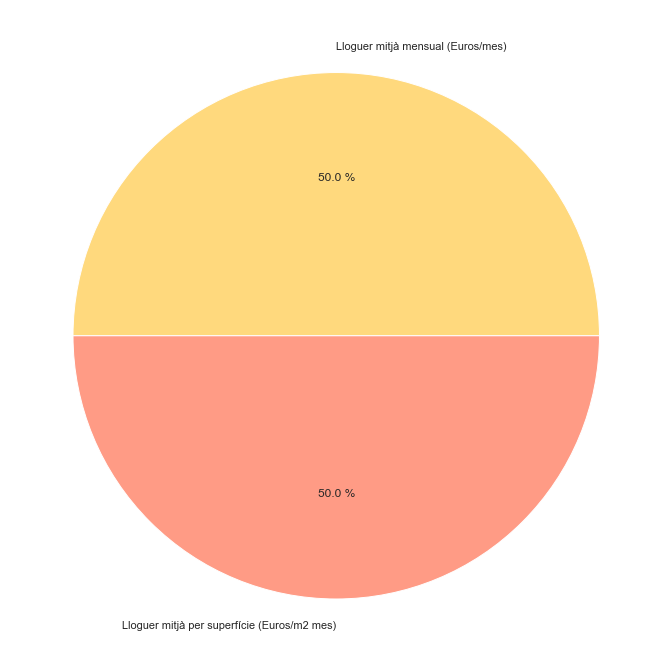

In [130]:
y = df_lloguer['Lloguer_mitja'].value_counts()
mylabels = ["Lloguer mitjà mensual (Euros/mes)", "Lloguer mitjà per superfície (Euros/m2 mes)"]
colores = ["#FFD97D","#FF9B85"]
plt.pie(y, labels = mylabels,autopct="%0.1f %%",colors=colores)
plt.savefig("m2-mensual.jpg", bbox_inches='tight')

En este gráfico de tarta podemos apreciar que se han incluido en la muestra la misma cantidad de datos sobre Alquileres mensuales y Alquileres por superficie.

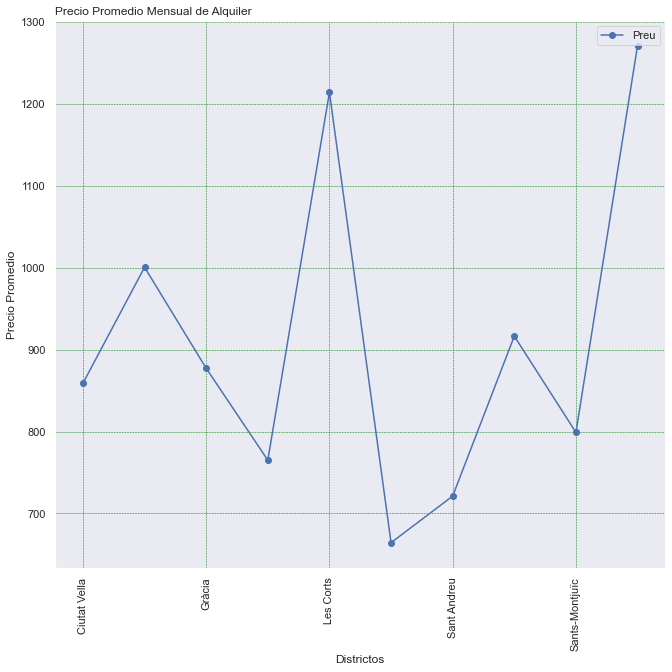

In [124]:
df_lloguer[df_lloguer['Lloguer_mitja'] == 'Lloguer mitjà mensual (Euros/mes)'].groupby('Nom_Districte')['Preu'].mean().plot(x='Nom_Districte', marker = 'o',legend=True)
plt.xlabel("Districtos")
plt.ylabel("Precio Promedio")
plt.xticks(rotation=90)
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title("Precio Promedio Mensual de Alquiler ", loc = 'left')
plt.savefig("Precio promedio.jpg", bbox_inches='tight')


En este gráfico se puede observar el precio promedio de alquileres por districtos. 

### Una variable numèrica (Preu)

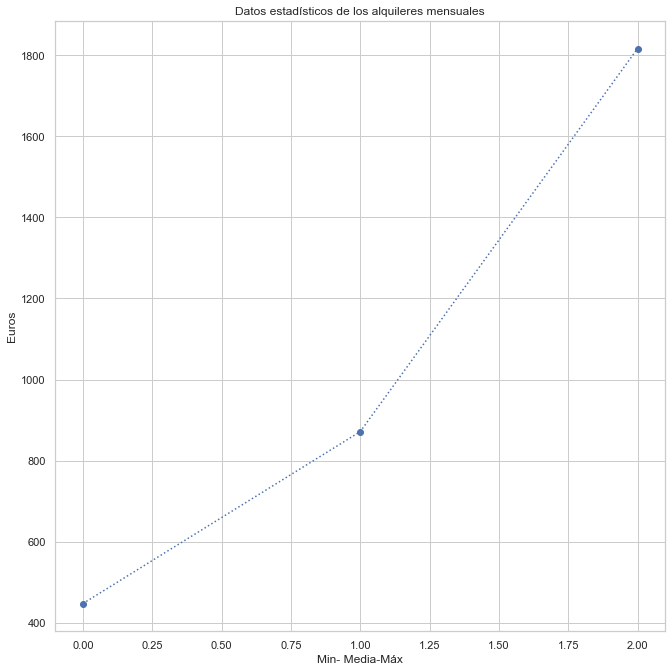

In [127]:
a=df_lloguer[df_lloguer.Lloguer_mitja=='Lloguer mitjà mensual (Euros/mes)']['Preu'].min() 
b=df_lloguer[df_lloguer.Lloguer_mitja=='Lloguer mitjà mensual (Euros/mes)']['Preu'].mean() 
c=df_lloguer[df_lloguer.Lloguer_mitja=='Lloguer mitjà mensual (Euros/mes)']['Preu'].max()
y= (a,b,c)

plt.plot(y, linestyle = 'dotted',marker = 'o')
plt.ylabel("Euros")
plt.xlabel("Min- Media-Máx")
plt.title('Datos estadísticos de los alquileres mensuales')

plt.savefig("Mim-Med-Max .png")

Este gráfico nos muestra el precio mínimo, el precio medio y el precio máximo de alquiler mensual en Barcelona.

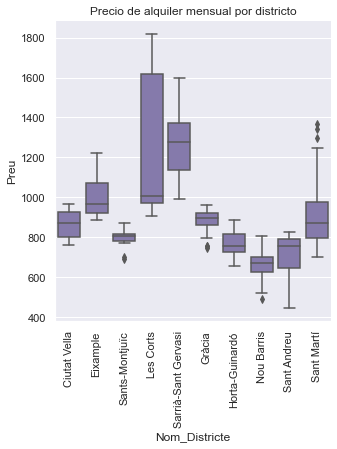

In [128]:

sns.set(style="darkgrid")
sns.catplot(y='Preu', x='Nom_Districte',kind='box',data = df_lloguer[df_lloguer.Lloguer_mitja=='Lloguer mitjà mensual (Euros/mes)'],color='m')
plt.xticks(rotation=90)
plt.title('Precio de alquiler mensual por districto')

plt.savefig("Precio mensual por districto.jpg", bbox_inches='tight')


Este diagrama  muestra un resumen de una gran cantidad de datos ,además de intuir su morfología y simetría.

Este tipo de gráficos nos permite identificar valores atípicos (en este caso en los Districtos de Sans-Montjuic, Gracia y Guinardó) y comparar distribuciones. 

#### Dues variables numèriques (Any o Trimestre i Preu)

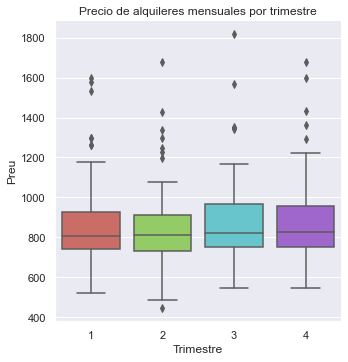

In [129]:

sns.set(style="darkgrid")
sns.catplot(y='Preu', x='Trimestre',kind='box',palette ='hls',data = df_lloguer[df_lloguer.Lloguer_mitja=='Lloguer mitjà mensual (Euros/mes)'],color='w')
plt.title('Precio de alquileres mensuales por trimestre')

plt.savefig("Precio mensual por trimestre.jpg", bbox_inches='tight')

En este gráfico se puede observar la variación en el precio de los alquileres por trimestre. Se puede observar que la media se ha mantenido constante y que en el segundo trimestre el alquiler máximo ha sufrido una leve caida que repunto en el tercer trimestre.

#### Tres variables (Barri o Districte, Trimestre i Preu)

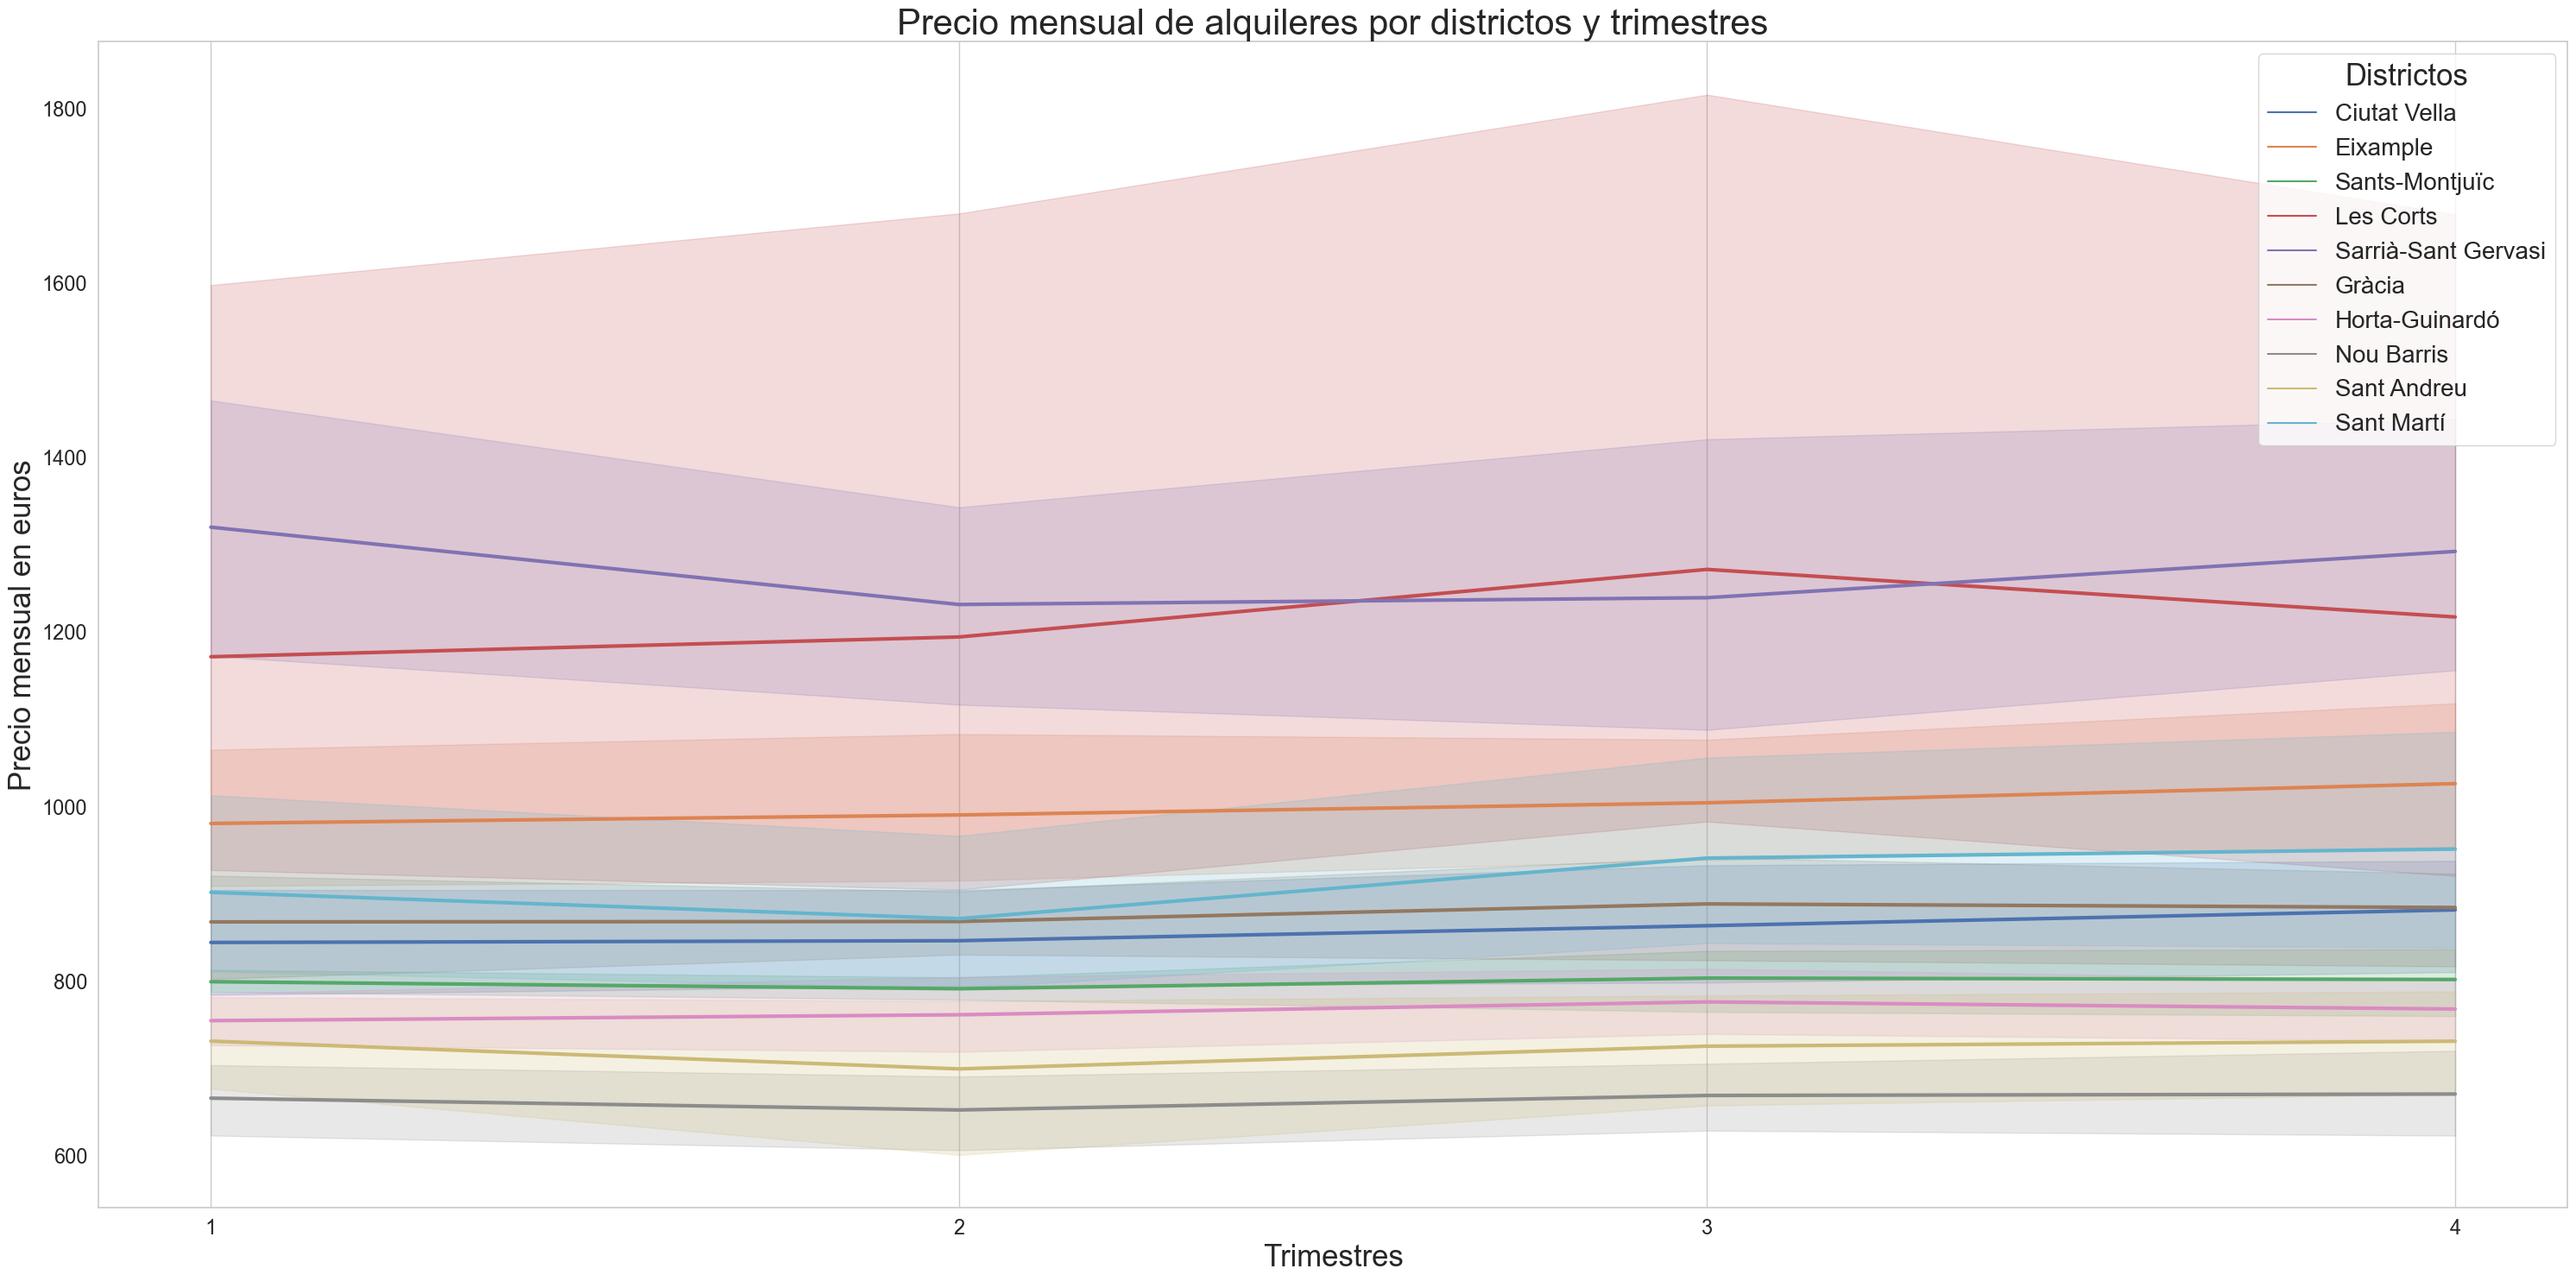

In [125]:
plt.figure(figsize=(30,15), dpi=100)
sns.set_theme(style="whitegrid")
sns.color_palette("tab10")
sns.lineplot(x = 'Trimestre', y='Preu', hue ='Nom_Districte' ,linewidth = 3,data=df_lloguer[df_lloguer.Lloguer_mitja=='Lloguer mitjà mensual (Euros/mes)'])
plt.ylabel('Precio mensual en euros', fontsize=25)
plt.xlabel('Trimestres', fontsize=25)
plt.title('Precio mensual de alquileres por districtos y trimestres',fontsize=30)
plt.tick_params(labelsize=17)
plt.grid(axis='y')
plt.legend(title="Districtos", fontsize=20, title_fontsize=25)
plt.savefig("Precio mensual por trimestre y districto.png", bbox_inches='tight')

En este gráfico podemos observar cómo varía el precio del los alquileres mensuales en cada distrcito a través de los trimestres del año 2021. Se aprecia que los alquileres más altos se encuentran en los districtos de Sarrià- Sant Gervasi y en Les Corts. 
Los alquileres más bajos se encuentran en Nou Barris. 
En general se han mantenido estables los precios durante todo el año, menos en Sarrià- Sant Gervasi y en Les Cortes que han variado durante el año.

### - Exercici 2
Exporta els gràfics com imatges o com HTML. 
* Realizado en cada gráfico.

### - Exercici 3
Proposa alguna visualització que creguis que pot resultar interessant.

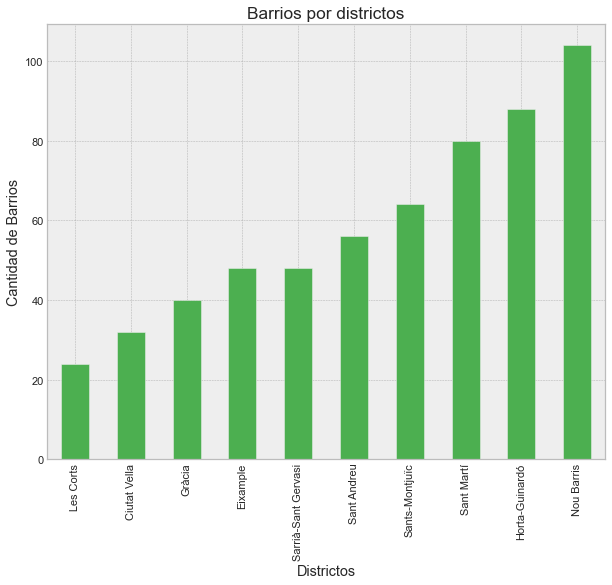

In [89]:
BarriosxDistrictos=df_lloguer.groupby('Nom_Districte')['Nom_Barri'].count().sort_values()
BarriosxDistrictos
BarriosxDistrictos.plot(kind='bar',title="Barrios por districtos", color="#4CAF50");
plt.xlabel("Districtos")
plt.ylabel("Cantidad de Barrios")
plt.savefig("barriosxdistrictos.png", bbox_inches='tight')

En este gráfico de barras podemos observar la cantidad de barrios que conforman cada districto. Se observa que el districto con menos barrios es Les Corts y el que más barrios tiene es Nou Barris. Example y Sarrià-Sant Gervasi tienen la misma cantidad de barrios.